# How to Identify Overfitting Machine Learning Models in Scikit-Learn
https://machinelearningmastery.com/overfitting-machine-learning-models/

>1, train: 0.766, test: 0.760
>2, train: 0.810, test: 0.805
>3, train: 0.879, test: 0.878
>4, train: 0.900, test: 0.895
>5, train: 0.915, test: 0.905
>6, train: 0.928, test: 0.916
>7, train: 0.939, test: 0.922
>8, train: 0.945, test: 0.919
>9, train: 0.955, test: 0.928
>10, train: 0.959, test: 0.924
>11, train: 0.968, test: 0.925
>12, train: 0.973, test: 0.925
>13, train: 0.979, test: 0.926
>14, train: 0.984, test: 0.922
>15, train: 0.988, test: 0.924
>16, train: 0.991, test: 0.920
>17, train: 0.994, test: 0.926
>18, train: 0.996, test: 0.916
>19, train: 0.998, test: 0.919
>20, train: 0.999, test: 0.912


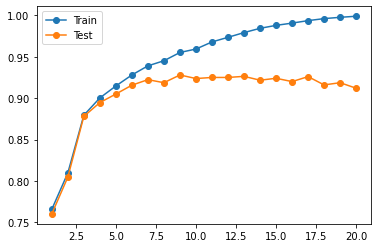

In [2]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()




In [ ]:
Running the example fits and evaluates a decision tree on the train and test sets for each tree depth and reports the accuracy scores.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see a trend of increasing accuracy on the training dataset with the tree depth to a point around a depth of 19-20 levels where the tree fits the training dataset perfectly.

We can also see that the accuracy on the test set improves with tree depth until a depth of about eight or nine levels, after which accuracy begins to get worse with each increase in tree depth.

This is exactly what we would expect to see in a pattern of overfitting.

We would choose a tree depth of eight or nine before the model begins to overfit the training dataset.

>1, train: 0.766, test: 0.760
>2, train: 0.810, test: 0.805
>3, train: 0.879, test: 0.878
>4, train: 0.900, test: 0.895
>5, train: 0.915, test: 0.905
>6, train: 0.928, test: 0.916
>7, train: 0.939, test: 0.922
>8, train: 0.945, test: 0.919
>9, train: 0.955, test: 0.928
>10, train: 0.959, test: 0.924
>11, train: 0.968, test: 0.925
>12, train: 0.973, test: 0.925
>13, train: 0.979, test: 0.926
>14, train: 0.984, test: 0.922
>15, train: 0.988, test: 0.924
>16, train: 0.991, test: 0.920
>17, train: 0.994, test: 0.926
>18, train: 0.996, test: 0.916
>19, train: 0.998, test: 0.919
>20, train: 0.999, test: 0.912
        
A figure is also created that shows line plots of the model accuracy on the train and test sets with different tree depths.

The plot clearly shows that increasing the tree depth in the early stages results in a corresponding improvement in both train and test sets.

This continues until a depth of around 10 levels, after which the model is shown to overfit the training dataset at the cost of worse performance on the holdout dataset.

Line Plot of Decision Tree Accuracy on Train and Test Datasets for Different Tree Depths
Line Plot of Decision Tree Accuracy on Train and Test Datasets for Different Tree Depths

This analysis is interesting. It shows why the model has a worse hold-out test set performance when “max_depth” is set to large values.

But it is not required.

We can just as easily choose a “max_depth” using a grid search without performing an analysis on why some values result in better performance and some result in worse performance.

In fact, in the next section, we will show where this analysis can be misleading.

>1, train: 1.000, test: 0.920
>2, train: 0.961, test: 0.914
>3, train: 0.961, test: 0.936
>4, train: 0.955, test: 0.929
>5, train: 0.954, test: 0.939
>6, train: 0.953, test: 0.938
>7, train: 0.950, test: 0.939
>8, train: 0.948, test: 0.940
>9, train: 0.946, test: 0.938
>10, train: 0.946, test: 0.935
>11, train: 0.946, test: 0.938
>12, train: 0.943, test: 0.939
>13, train: 0.942, test: 0.938
>14, train: 0.942, test: 0.938
>15, train: 0.942, test: 0.938
>16, train: 0.941, test: 0.936
>17, train: 0.940, test: 0.938
>18, train: 0.941, test: 0.935
>19, train: 0.940, test: 0.936
>20, train: 0.940, test: 0.935
>21, train: 0.940, test: 0.935
>22, train: 0.940, test: 0.935
>23, train: 0.938, test: 0.933
>24, train: 0.939, test: 0.933
>25, train: 0.937, test: 0.931
>26, train: 0.938, test: 0.930
>27, train: 0.936, test: 0.932
>28, train: 0.937, test: 0.932
>29, train: 0.936, test: 0.933
>30, train: 0.936, test: 0.933
>31, train: 0.936, test: 0.933
>32, train: 0.936, test: 0.932
>33, train: 0.936

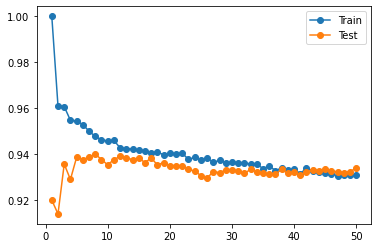

In [3]:
# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()


In [ ]:
Running the example fits and evaluates a KNN model on the train and test sets for each number of neighbors and reports the accuracy scores.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

Recall, we are looking for a pattern where performance on the test set improves and then starts to get worse, and performance on the training set continues to improve.

We do not see this pattern.

Instead, we see that accuracy on the training dataset starts at perfect accuracy and falls with almost every increase in the number of neighbors.

We also see that performance of the model on the holdout test improves to a value of about five neighbors, holds level and begins a downward trend after that.

>1, train: 1.000, test: 0.920
>2, train: 0.961, test: 0.914
>3, train: 0.961, test: 0.936
>4, train: 0.955, test: 0.929
>5, train: 0.954, test: 0.939
>6, train: 0.953, test: 0.938
>7, train: 0.950, test: 0.939
>8, train: 0.948, test: 0.940
>9, train: 0.946, test: 0.938
>10, train: 0.946, test: 0.935
>11, train: 0.946, test: 0.938
>12, train: 0.943, test: 0.939
>13, train: 0.942, test: 0.938
>14, train: 0.942, test: 0.938
>15, train: 0.942, test: 0.938
>16, train: 0.941, test: 0.936
>17, train: 0.940, test: 0.938
>18, train: 0.941, test: 0.935
>19, train: 0.940, test: 0.936
>20, train: 0.940, test: 0.935
>21, train: 0.940, test: 0.935
>22, train: 0.940, test: 0.935
>23, train: 0.938, test: 0.933
>24, train: 0.939, test: 0.933
>25, train: 0.937, test: 0.931
>26, train: 0.938, test: 0.930
>27, train: 0.936, test: 0.932
>28, train: 0.937, test: 0.932
>29, train: 0.936, test: 0.933
>30, train: 0.936, test: 0.933
>31, train: 0.936, test: 0.933
>32, train: 0.936, test: 0.932
>33, train: 0.936, test: 0.933
>34, train: 0.936, test: 0.932
>35, train: 0.934, test: 0.932
>36, train: 0.935, test: 0.931
>37, train: 0.933, test: 0.931
>38, train: 0.934, test: 0.933
>39, train: 0.933, test: 0.932
>40, train: 0.933, test: 0.932
>41, train: 0.932, test: 0.931
>42, train: 0.934, test: 0.932
>43, train: 0.933, test: 0.933
>44, train: 0.932, test: 0.933
>45, train: 0.932, test: 0.934
>46, train: 0.932, test: 0.933
>47, train: 0.931, test: 0.932
>48, train: 0.931, test: 0.932
>49, train: 0.931, test: 0.932
>50, train: 0.931, test: 0.934
A figure is also created that shows line plots of the model accuracy on the train and test sets with different numbers of neighbors.

The plots make the situation clearer. It looks as though the line plot for the training set is dropping to converge with the line for the test set. Indeed, this is exactly what is happening.

Line Plot of KNN Accuracy on Train and Test Datasets for Different Numbers of Neighbors
Line Plot of KNN Accuracy on Train and Test Datasets for Different Numbers of Neighbors

Now, recall how KNN works.

The “model” is really just the entire training dataset stored in an efficient data structure. Skill for the “model” on the training dataset should be 100 percent and anything less is unforgivable.

In fact, this argument holds for any machine learning algorithm and slices to the core of the confusion around overfitting for beginners.


In [ ]:
Tutorials


How to Avoid Overfitting in Deep Learning Neural Networks
https://machinelearningmastery.com/introduction-to-regularization-to-reduce-overfitting-and-improve-generalization-error/

Overfitting and Underfitting With Machine Learning Algorithms
https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/

How to use Learning Curves to Diagnose Machine Learning Model Performance
https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/
